# annotate conflict of interest statements

flag 1 for "has conflict" or 0 for "no conflict"

In [1]:
import pandas as pd
from normality import normalize
%matplotlib inline

In [2]:
df = pd.read_csv('../data/full/meta/Documentation.coi.csv').drop_duplicates(subset=('document',))
df['date'] = df['date'].fillna('').map(lambda x: x.split(';')[0]).map(str.strip)
df['date'] = pd.DatetimeIndex(pd.to_datetime(df['date']))
df = df.set_index('date')
df.head()

id  \
date                                                   
2020-01-21  000000006c5b1793621e09e4f34c52a88f0fffbb   
2009-02-03  00000030826893b3f35b18daf5d63a32a9837305   
2017-12-05  000003821e197e1c44172875136625278a125de8   
2018-12-06  000003fe413b4afdcad00165826052800aec00a0   
2015-01-20  000007b3c57df167ce54cdd7d099eab8e828ab26   

                                            document  \
date                                                   
2020-01-21  a9bc5a4f6338678152e11a257b1e6d2b971f584d   
2009-02-03  95eeaac9d3c29c0a66a16592387e9fe5df32ab54   
2017-12-05  c4519c7e99ab03cb9b0d84810f2df8d547ea8da9   
2018-12-06  a1a7c646d604f819509bdfb012b865167f976c6f   
2015-01-20  1f0a1c10096a116055ab95315b4f9ad07d0d259b   

                                              entity  \
date                                                   
2020-01-21  598bc9f4df03dd9caccb41f0caa47a920ac80d06   
2009-02-03  1a723212bd659de754fe5b6c16fa3641dddb582d   
2017-12-05  7cb89b947ea24aa6e3f13c7ed102f4877efe1b54   
2018-12-06  10eec3ced69ec5cb9745c986f955ce858e52a883   
2015-01-20  5bcc37fb44f37e1bba7d558840552cc78beb2015   

                                                    publisher  \
date                                                            
2020-01-21                          Stem Cells (Dayton, Ohio)   
2009-02-03                                      PLoS Medicine   
2017-12-05  Proceedings of the National Academy of Science...   
2018-12-06                                           PLoS ONE   
2015-01-20                      BioMed Research International   

                                                      summary  
date                                                           
2020-01-21  CONFLICT OF INTEREST\nThe authors indicated no...  
2009-02-03  Competing Interests:\n Seven of the authors ar...  
2017-12-05       The authors declare no conflict of interest.  
2018-12-06  Competing Interests: \nThe authors have declar...  
2015-01-20  Conflict of Interests\nThe authors report no c...

In [3]:
len(df)

2224501

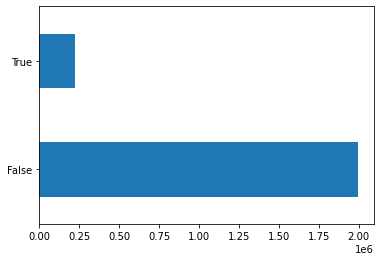

In [4]:
def get_has_conflict(text):
    if pd.isnull(text):
        return False
    text = normalize(text.replace('\n', ' '))
    if 'all others' in text:
        return True
    if 'remaining authors' in text:
        return True
    if 'no other' in text:
        return True
    if 'no conflict' in text:
        return False
    if 'no potential conflict' in text:
        return False
    if 'no competing' in text:
        return False
    if 'no financial' in text:
        return False
    if 'no known' in text:
        return False
    if text == 'none':
        return False
    if text.startswith('none '):
        return False
    if text.endswith('none'):
        return False
    if 'nothing to report' in text:
        return False
    if 'none declared' in text:
        return False
    if 'no authors have' in text:
        return False
    return True

df['has_conflict'] = df['summary'].map(get_has_conflict)
df['has_conflict'].value_counts().plot.barh()

In [5]:
def to_int(val):
    try:
        return int(val)
    except TypeError:
        return -1
    
df['has_conflict'] = df['has_conflict'].map(to_int)
df['has_conflict'].value_counts()

0    1998714
1     225787
Name: has_conflict, dtype: int64

In [6]:
df.head()

id  \
date                                                   
2020-01-21  000000006c5b1793621e09e4f34c52a88f0fffbb   
2009-02-03  00000030826893b3f35b18daf5d63a32a9837305   
2017-12-05  000003821e197e1c44172875136625278a125de8   
2018-12-06  000003fe413b4afdcad00165826052800aec00a0   
2015-01-20  000007b3c57df167ce54cdd7d099eab8e828ab26   

                                            document  \
date                                                   
2020-01-21  a9bc5a4f6338678152e11a257b1e6d2b971f584d   
2009-02-03  95eeaac9d3c29c0a66a16592387e9fe5df32ab54   
2017-12-05  c4519c7e99ab03cb9b0d84810f2df8d547ea8da9   
2018-12-06  a1a7c646d604f819509bdfb012b865167f976c6f   
2015-01-20  1f0a1c10096a116055ab95315b4f9ad07d0d259b   

                                              entity  \
date                                                   
2020-01-21  598bc9f4df03dd9caccb41f0caa47a920ac80d06   
2009-02-03  1a723212bd659de754fe5b6c16fa3641dddb582d   
2017-12-05  7cb89b947ea24aa6e3f13c7ed102f4877efe1b54   
2018-12-06  10eec3ced69ec5cb9745c986f955ce858e52a883   
2015-01-20  5bcc37fb44f37e1bba7d558840552cc78beb2015   

                                                    publisher  \
date                                                            
2020-01-21                          Stem Cells (Dayton, Ohio)   
2009-02-03                                      PLoS Medicine   
2017-12-05  Proceedings of the National Academy of Science...   
2018-12-06                                           PLoS ONE   
2015-01-20                      BioMed Research International   

                                                      summary  has_conflict  
date                                                                         
2020-01-21  CONFLICT OF INTEREST\nThe authors indicated no...             0  
2009-02-03  Competing Interests:\n Seven of the authors ar...             1  
2017-12-05       The authors declare no conflict of interest.             0  
2018-12-06  Competing Interests: \nThe authors have declar...             0  
2015-01-20  Conflict of Interests\nThe authors report no c...             0

In [7]:
df[['document', 'publisher', 'has_conflict']].to_csv('./export/coi.annotated.csv')